# CORONA SPREAD,One of the Biggest Challange Mankind Ever Faced

![https://i.postimg.cc/tTNSDvvV/Corona.jpg](https://i.postimg.cc/tTNSDvvV/Corona.jpg)

# What we gonna do:
We will analyse the outbreak of coronavirus across various regions,visualize them using charts and graphs and predict 
the number of upcoming upcoming cases for the next 10 days using linear Regression and Support Vector Machine(SVM) model in Python.

In [1]:
# Importing all the important libraries.

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error
import datetime
import operator
import numpy as np
from sklearn.linear_model import LinearRegression
plt.style.use('seaborn')
%matplotlib inline

In [2]:
# loading all the three datasets

confirmed_cases = pd.read_csv("../input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv")

In [3]:
deaths_reported = pd.read_csv("../input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv")

In [4]:
recovered_cases = pd.read_csv("../input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv")

In [5]:
# display the head of the Dataset

confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,197,238,428,566,673,790,900,1030,1183,1306


In [6]:
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,19,22,22,27,29,29,29,33,35,40
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,2,2,2,3,4,10


In [7]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,35,35,35,35,41,42,42,42,42,44
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,118,118,118,144,144,144,150,191,232,235
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,97,105,105,109,114,114,114,124,140,144
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,26,35,42,42,49,60,75,87,114,139


In [8]:
# Extracting all the columns using the .keys() function.
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20'],
      dtype='object')

In [9]:
# Extracting only the dates columns that have information of confirmed,deaths and recovered cases.
confirmed =  confirmed_cases.loc[:, cols[4]:cols[-1]]

In [10]:
deaths = deaths_reported.loc[:, cols[4]:cols[-1]]

In [11]:
recoveries = recovered_cases.loc[:, cols[4]:cols[-1]]

In [12]:
# Check the head of the outbreak cases.
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,2,3,5,7,8,8,14,14,14,19,...,75,82,114,147,177,212,272,322,411,599
1,2,1,2,2,4,4,7,7,11,15,...,701,773,839,825,878,889,924,963,1007,1086
2,0,1,3,3,4,5,7,7,10,13,...,200,212,226,243,266,313,345,385,432,455
3,0,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,0,0,0,3,4,4,4,7,8,8,...,197,238,428,566,673,790,900,1030,1183,1306


In [13]:
# Finding the total confirmed cases,death cases and the recovered cases and append them to an 4 empty lists.
# Also, calculate the total mortality rate which is the death sum/confirmed cases.

dates = confirmed.keys()
world_cases = []
total_deaths = []
mortality_rate = []
total_recovered = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [14]:
# Lets display each of the newly created variables
confirmed_sum

335955

In [15]:
death_sum

14632

In [16]:
recovered_sum

97704

In [17]:
world_cases

[555,
 653,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19881,
 23892,
 27635,
 30817,
 34391,
 37120,
 40150,
 42762,
 44802,
 45221,
 60368,
 66885,
 69030,
 71224,
 73258,
 75136,
 75639,
 76197,
 76823,
 78579,
 78965,
 79568,
 80413,
 81395,
 82754,
 84120,
 86011,
 88369,
 90306,
 92840,
 95120,
 97882,
 101784,
 105821,
 109795,
 113561,
 118592,
 125865,
 128343,
 145193,
 156094,
 167446,
 181527,
 197142,
 214910,
 242708,
 272166,
 304524,
 335955]

In [18]:
# Convert all the dates and the cases in the form of a numpy array

days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
total_recovered = np.array(total_recovered).reshape(-1,1)

In [19]:
days_since_1_22

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60]])

In [20]:
world_cases

[555,
 653,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19881,
 23892,
 27635,
 30817,
 34391,
 37120,
 40150,
 42762,
 44802,
 45221,
 60368,
 66885,
 69030,
 71224,
 73258,
 75136,
 75639,
 76197,
 76823,
 78579,
 78965,
 79568,
 80413,
 81395,
 82754,
 84120,
 86011,
 88369,
 90306,
 92840,
 95120,
 97882,
 101784,
 105821,
 109795,
 113561,
 118592,
 125865,
 128343,
 145193,
 156094,
 167446,
 181527,
 197142,
 214910,
 242708,
 272166,
 304524,
 335955]

In [21]:
total_deaths

array([[   17],
       [   18],
       [   26],
       [   42],
       [   56],
       [   82],
       [  131],
       [  133],
       [  171],
       [  213],
       [  259],
       [  362],
       [  426],
       [  492],
       [  564],
       [  634],
       [  719],
       [  806],
       [  906],
       [ 1013],
       [ 1113],
       [ 1118],
       [ 1371],
       [ 1523],
       [ 1666],
       [ 1770],
       [ 1868],
       [ 2007],
       [ 2122],
       [ 2247],
       [ 2251],
       [ 2458],
       [ 2469],
       [ 2629],
       [ 2708],
       [ 2770],
       [ 2814],
       [ 2872],
       [ 2941],
       [ 2996],
       [ 3085],
       [ 3160],
       [ 3254],
       [ 3348],
       [ 3460],
       [ 3558],
       [ 3802],
       [ 3988],
       [ 4262],
       [ 4615],
       [ 4720],
       [ 5404],
       [ 5819],
       [ 6440],
       [ 7126],
       [ 7905],
       [ 8733],
       [ 9867],
       [11299],
       [12973],
       [14632]])

In [22]:
total_recovered

array([[   28],
       [   30],
       [   36],
       [   39],
       [   52],
       [   61],
       [  107],
       [  126],
       [  143],
       [  222],
       [  284],
       [  472],
       [  623],
       [  852],
       [ 1124],
       [ 1487],
       [ 2011],
       [ 2616],
       [ 3244],
       [ 3946],
       [ 4683],
       [ 5150],
       [ 6295],
       [ 8058],
       [ 9395],
       [10865],
       [12583],
       [14352],
       [16121],
       [18177],
       [18890],
       [22886],
       [23394],
       [25227],
       [27905],
       [30384],
       [33277],
       [36711],
       [39782],
       [42716],
       [45602],
       [48228],
       [51170],
       [53796],
       [55865],
       [58358],
       [60694],
       [62494],
       [64404],
       [67003],
       [68324],
       [70251],
       [72624],
       [76034],
       [78088],
       [80840],
       [83207],
       [84854],
       [87256],
       [91499],
       [97704]])

In [23]:
# Future forecasting for the next 10 days

days_in_future = 10
future_forecast = np.array([i for i in range (len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates = future_forecast[:-10]

In [24]:
future_forecast

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70]])

In [25]:
# Convert all the integers into datetime for better visualization.
start = '1/22/2020'
start_date = datetime.datetime.strptime(start,'%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forecast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [26]:
# For visualization with the latest data of the 15th of march

latest_confirmed = confirmed_cases[dates[-1]]
latest_deaths = deaths_reported[dates[-1]]

In [27]:
latest_confirmed

0       599
1      1086
2       455
3         2
4      1306
       ... 
482       1
483       1
484       1
485       1
486       1
Name: 3/22/20, Length: 487, dtype: int64

In [28]:
latest_deaths

0       1
1      40
2       2
3       0
4      10
       ..
482     0
483     0
484     0
485     0
486     0
Name: 3/22/20, Length: 487, dtype: int64

In [29]:
# Find the list of unique countries
unique_countries = list(confirmed_cases['Country/Region'].unique())
unique_countries

['Thailand',
 'Japan',
 'Singapore',
 'Nepal',
 'Malaysia',
 'Canada',
 'Australia',
 'Cambodia',
 'Sri Lanka',
 'Germany',
 'Finland',
 'United Arab Emirates',
 'Philippines',
 'India',
 'Italy',
 'Sweden',
 'Spain',
 'Belgium',
 'Egypt',
 'Lebanon',
 'Iraq',
 'Oman',
 'Afghanistan',
 'Bahrain',
 'Kuwait',
 'Algeria',
 'Croatia',
 'Switzerland',
 'Austria',
 'Israel',
 'Pakistan',
 'Brazil',
 'Georgia',
 'Greece',
 'North Macedonia',
 'Norway',
 'Romania',
 'Estonia',
 'San Marino',
 'Belarus',
 'Iceland',
 'Lithuania',
 'Mexico',
 'New Zealand',
 'Nigeria',
 'Ireland',
 'Luxembourg',
 'Monaco',
 'Qatar',
 'Ecuador',
 'Azerbaijan',
 'Armenia',
 'Dominican Republic',
 'Indonesia',
 'Portugal',
 'Andorra',
 'Latvia',
 'Morocco',
 'Saudi Arabia',
 'Senegal',
 'Argentina',
 'Chile',
 'Jordan',
 'Ukraine',
 'Hungary',
 'Liechtenstein',
 'Poland',
 'Tunisia',
 'Bosnia and Herzegovina',
 'Slovenia',
 'South Africa',
 'Bhutan',
 'Cameroon',
 'Colombia',
 'Costa Rica',
 'Peru',
 'Serbia',
 'Sl

In [30]:
# The next line of code will basically calculate the total number of confirmed cases by each country.

country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()

In [31]:
# Number of cases per Country/Region
print('Confirmed Cases by Countries/Regions:')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed Cases by Countries/Regions:
China: 81397 cases
Italy: 59138 cases
US: 33272 cases
Spain: 28768 cases
Germany: 24873 cases
Iran: 21638 cases
France: 16176 cases
Korea, South: 8897 cases
Switzerland: 7245 cases
United Kingdom: 5741 cases
Netherlands: 4216 cases
Belgium: 3401 cases
Austria: 3244 cases
Norway: 2383 cases
Sweden: 1934 cases
Portugal: 1600 cases
Brazil: 1593 cases
Denmark: 1514 cases
Canada: 1465 cases
Australia: 1314 cases
Malaysia: 1306 cases
Turkey: 1236 cases
Czechia: 1120 cases
Japan: 1086 cases
Israel: 1071 cases
Ireland: 906 cases
Luxembourg: 798 cases
Ecuador: 789 cases
Pakistan: 776 cases
Cruise Ship: 712 cases
Poland: 634 cases
Chile: 632 cases
Finland: 626 cases
Greece: 624 cases
Thailand: 599 cases
Iceland: 568 cases
Indonesia: 514 cases
Saudi Arabia: 511 cases
Qatar: 494 cases
Singapore: 455 cases
Romania: 433 cases
Slovenia: 414 cases
India: 396 cases
Philippines: 380 cases
Russia: 367 cases
Peru: 363 cases
Bahrain: 332 cases
Egypt: 327 cases
Estonia:

In [32]:
# Find the list of unique provinces
unique_provinces =  list(confirmed_cases['Province/State'].unique())
# those are countries, which are not provinces/states.
outliers = ['United Kingdom', 'Denmark', 'France']
for i in outliers:
    unique_provinces.remove(i)

In [33]:
# Finding the number of confirmed cases per provinces,state or city.
province_confirmed_cases = []
no_cases = [] 
for i in unique_provinces:
    cases = latest_confirmed[confirmed_cases['Province/State']==i].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
# remove areas with no confirmed cases
for i in no_cases:
    unique_provinces.remove(i)

In [34]:
# Number of cases per province/state/city
for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]}: {province_confirmed_cases[i]} cases')

British Columbia: 424 cases
New South Wales: 533 cases
Victoria: 296 cases
Queensland: 221 cases
South Australia: 100 cases
Western Australia: 120 cases
Tasmania: 22 cases
Northern Territory: 3 cases
Ontario: 425 cases
Alberta: 259 cases
Quebec: 219 cases
Washington: 1996 cases
New York: 15793 cases
California: 1642 cases
Massachusetts: 646 cases
Diamond Princess: 761 cases
Grand Princess: 43 cases
Georgia: 600 cases
Colorado: 476 cases
Florida: 830 cases
New Jersey: 1914 cases
Oregon: 161 cases
Texas: 627 cases
Illinois: 1049 cases
Pennsylvania: 509 cases
Iowa: 90 cases
Maryland: 244 cases
North Carolina: 302 cases
South Carolina: 196 cases
Tennessee: 505 cases
Virginia: 221 cases
Arizona: 152 cases
Indiana: 201 cases
Kentucky: 99 cases
District of Columbia: 102 cases
Nevada: 190 cases
New Hampshire: 65 cases
Minnesota: 169 cases
Nebraska: 51 cases
Ohio: 355 cases
Rhode Island: 83 cases
Wisconsin: 381 cases
Connecticut: 223 cases
Hawaii: 48 cases
Oklahoma: 67 cases
Utah: 181 cases
Kan

In [35]:
# Handling nan values if there is any,it is usually a float: float('nan')

nan_indices = [] 

for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

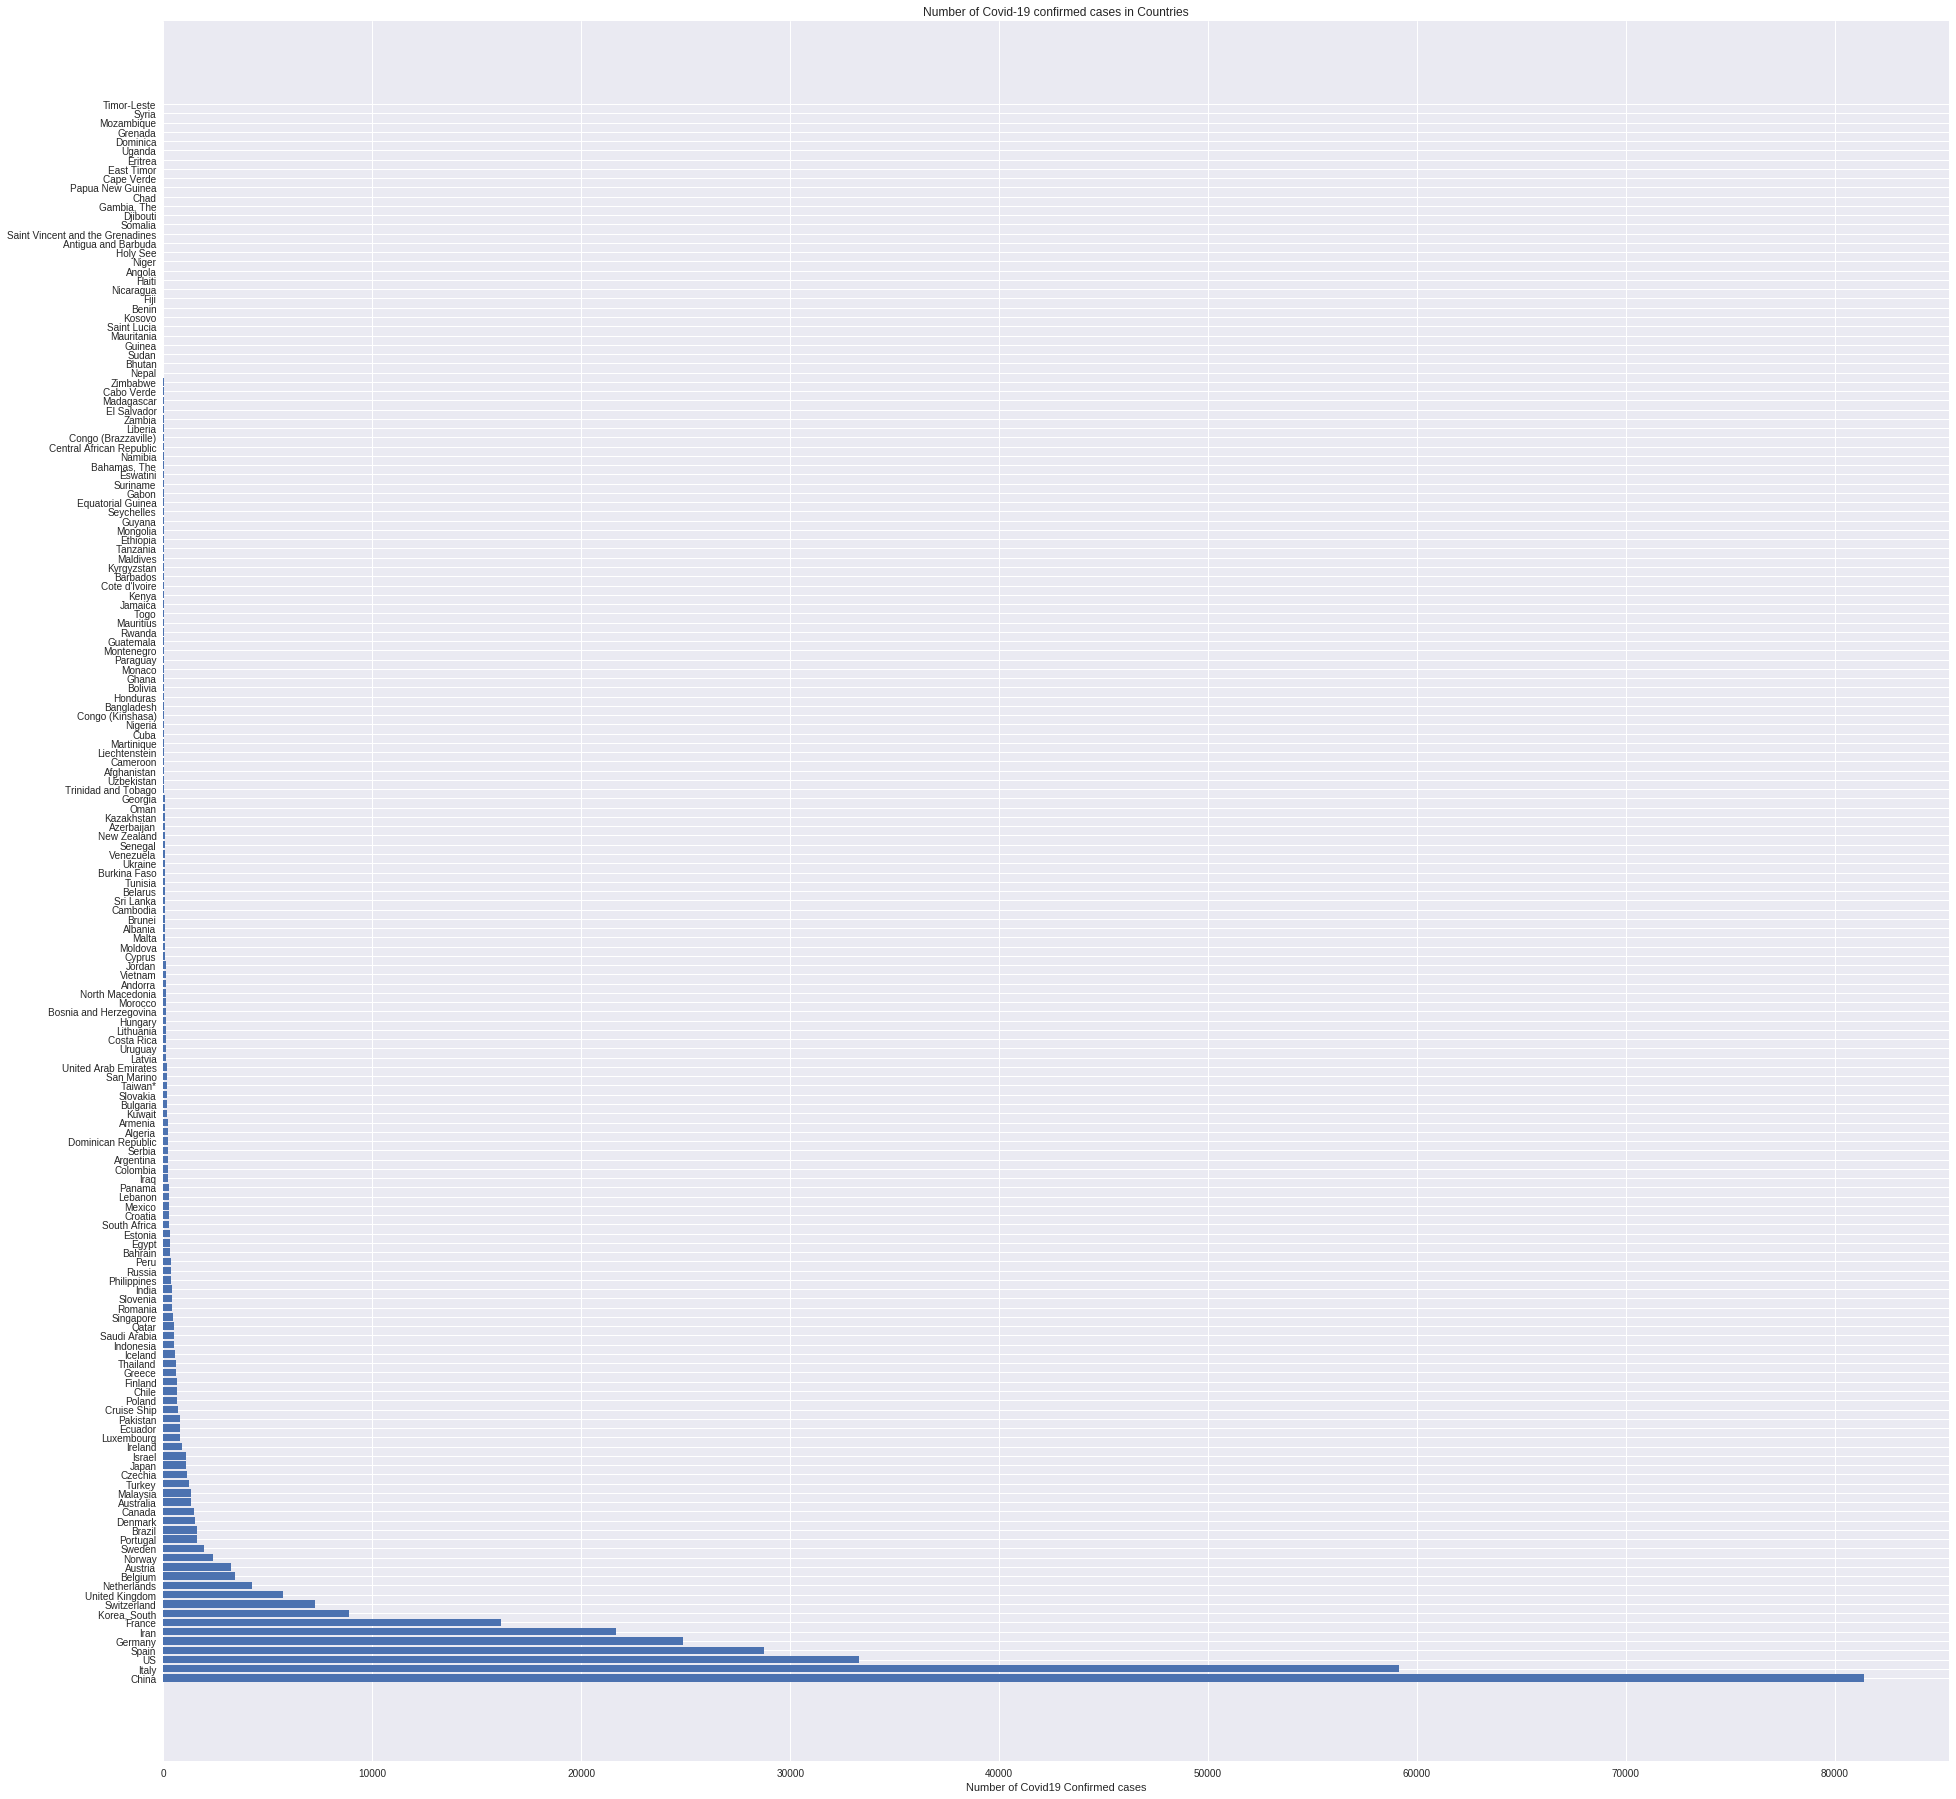

In [36]:
# Plot a bar graph to see the total confirmed cases across different countries.
plt.figure(figsize=(32,32))
plt.barh(unique_countries,country_confirmed_cases)
plt.title('Number of Covid-19 confirmed cases in Countries')
plt.xlabel('Number of Covid19 Confirmed cases')
plt.show()

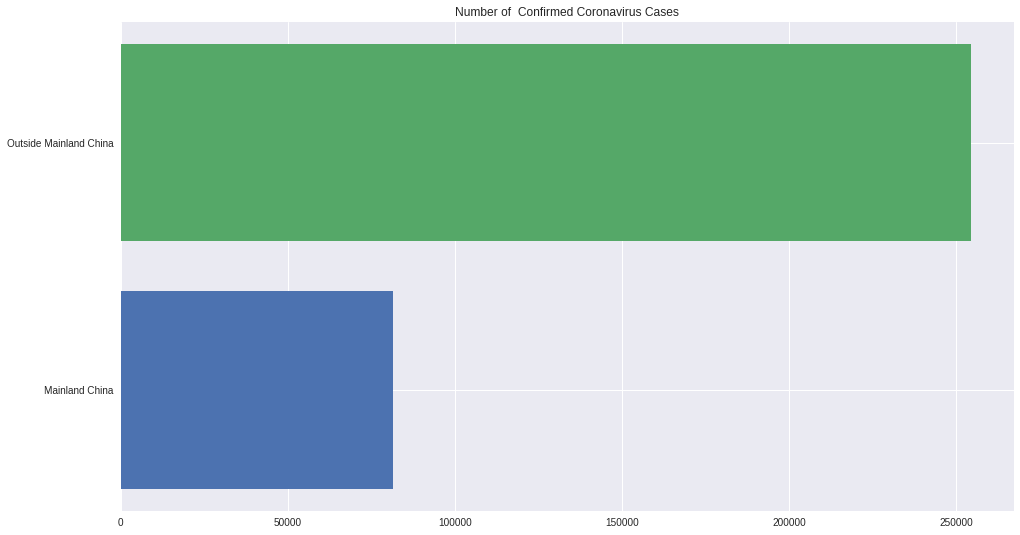

In [37]:
# Plot a bar graph to see the total confirmed cases between mainland china and outside mainland china.
china_confirmed = latest_confirmed[confirmed_cases['Country/Region']=='China'].sum()
outside_mainland_china_confirmed = np.sum(country_confirmed_cases) - china_confirmed
plt.figure(figsize=(16, 9))
plt.barh('Mainland China', china_confirmed)
plt.barh('Outside Mainland China', outside_mainland_china_confirmed)
plt.title('Number of  Confirmed Coronavirus Cases')
plt.show()

In [38]:
# Print the total cases in mainland in China and outside of it.
print('Outside Mainland China {} cases:'.format(outside_mainland_china_confirmed))
print('Mainland China: {} cases'.format(china_confirmed))
print('Total: {} cases'.format(china_confirmed+outside_mainland_china_confirmed))

Outside Mainland China 254558 cases:
Mainland China: 81397 cases
Total: 335955 cases


In [39]:
# Only show 10 countries with the most confirmed cases, the rest are grouped into the  category named others
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])
for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])

visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

# Visual Representations (bar charts and pie charts)


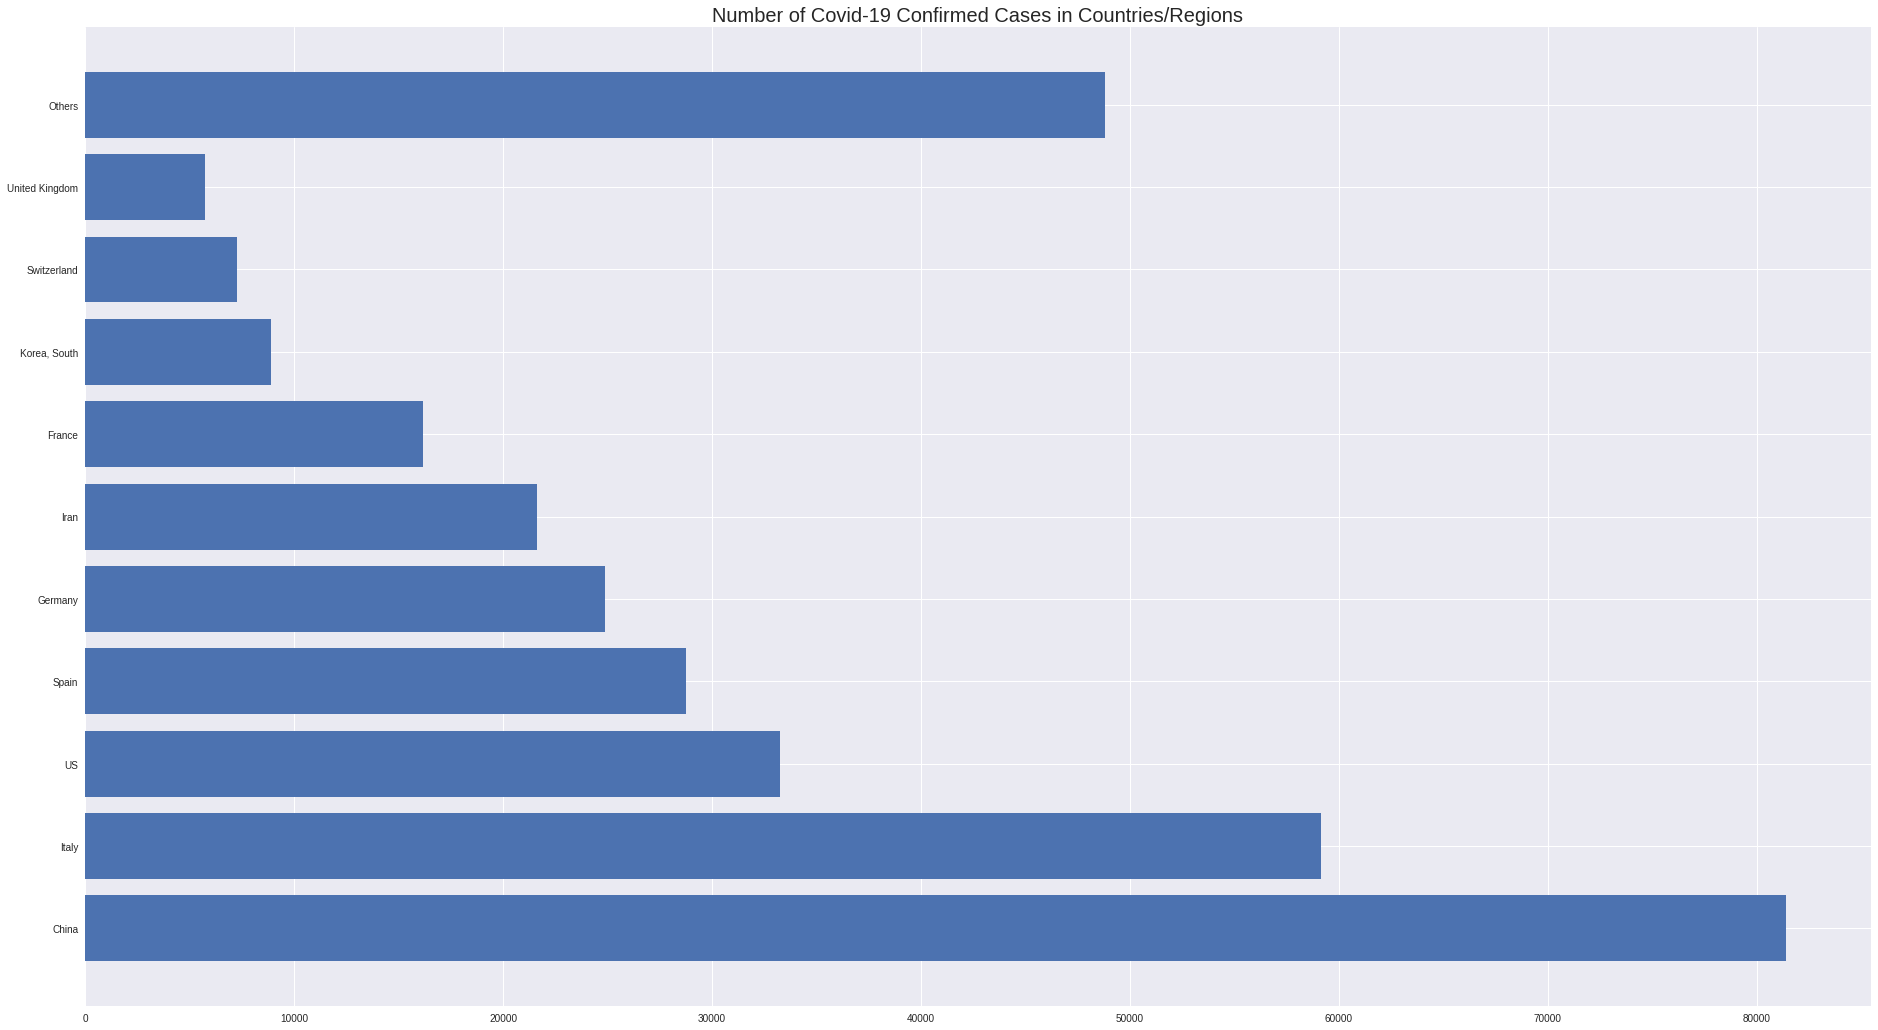

In [40]:
# Visualize the 10 Countries
plt.figure(figsize=(32, 18))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in Countries/Regions', size=20)
plt.show()

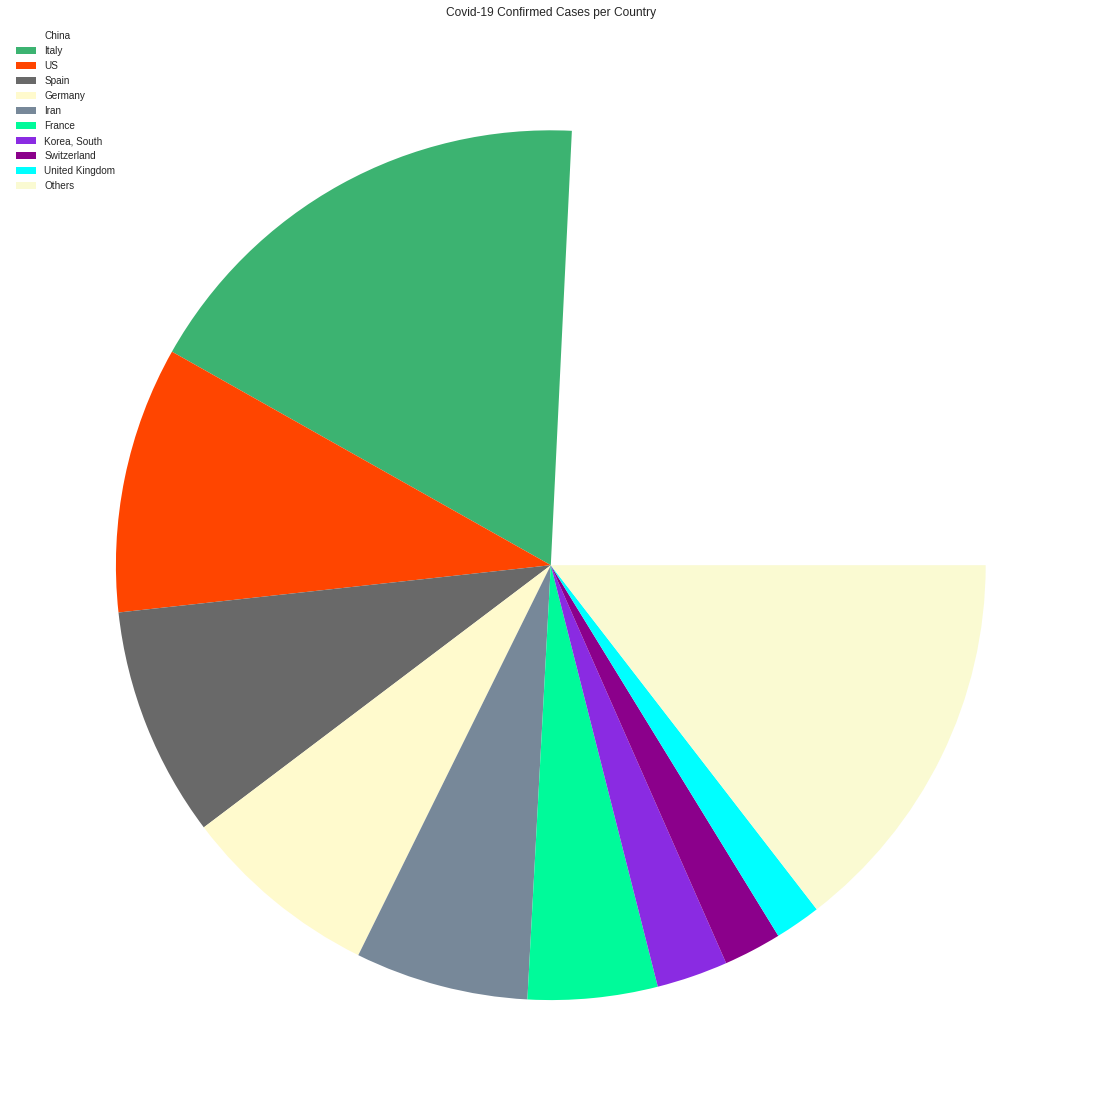

In [41]:
# Create a Pie chart to see the total confirmed cases in 10 different countries.

c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 Confirmed Cases per Country')
plt.pie(visual_confirmed_cases, colors=c)
plt.legend(visual_unique_countries, loc='best')
plt.show()

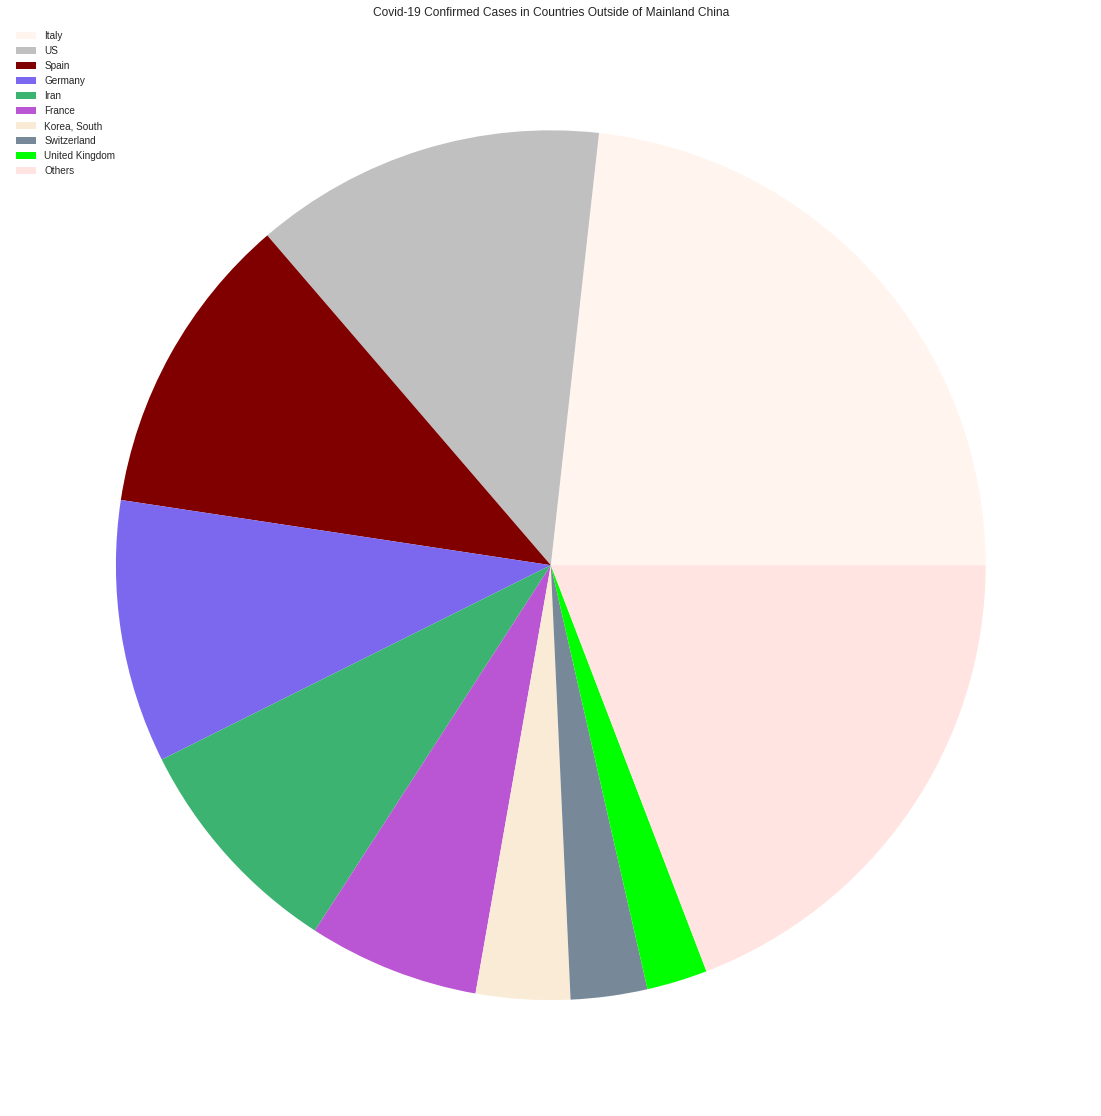

In [42]:
# Create a pie chart to see the total confirmed cases in 10 different countries outside China
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 Confirmed Cases in Countries Outside of Mainland China')
plt.pie(visual_confirmed_cases[1:], colors=c)
plt.legend(visual_unique_countries[1:], loc='best')
plt.show()

In [43]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.15, shuffle=False)

In [44]:
# Building the SVM Model
kernel = ['poly','sigmoid','rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking= [True, False]
svm_grid = {'kernel': kernel,'C': c,'gamma': gamma,'epsilon':epsilon,'shrinking':shrinking}
svm = SVR(kernel='poly')
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
svm_search.fit(X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  85 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   45.8s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='poly',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [45]:
svm_search.best_params_

{'shrinking': True, 'kernel': 'poly', 'gamma': 0.01, 'epsilon': 0.01, 'C': 1}

In [46]:
svm_confirmed = svm_search.best_estimator_
svm_pred = svm_confirmed.predict(future_forecast)

In [47]:
svm_confirmed

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=0.01,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [48]:
svm_pred

array([ 38981.91509753,  38982.64260939,  38987.73519242,  39001.55791779,
        39028.47585665,  39072.85408018,  39139.05765955,  39231.45166591,
        39354.40117045,  39512.27124432,  39709.4269587 ,  39950.23338474,
        40239.05559363,  40580.25865651,  40978.20764457,  41437.26762896,
        41961.80368086,  42556.18087144,  43224.76427185,  43971.91895326,
        44802.00998685,  45719.40244378,  46728.46139521,  47833.55191232,
        49039.03906627,  50349.28792823,  51768.66356936,  53301.53106084,
        54952.25547382,  56725.20187948,  58624.73534898,  60655.22095349,
        62821.02376418,  65126.50885221,  67576.04128875,  70173.98614497,
        72924.70849203,  75832.57340111,  78901.94594336,  82137.19118996,
        85542.67421207,  89122.76008086,  92881.8138675 ,  96824.20064315,
       100954.28547898, 105276.43344616, 109795.00961586, 114514.37905923,
       119438.90684746, 124572.95805169, 129920.89774312, 135487.09099289,
       141275.90287217, 1

MAE: 57414.2846476134
MSE: 5132383401.17988


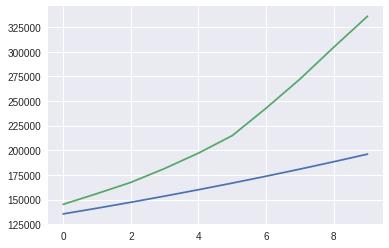

In [49]:
# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

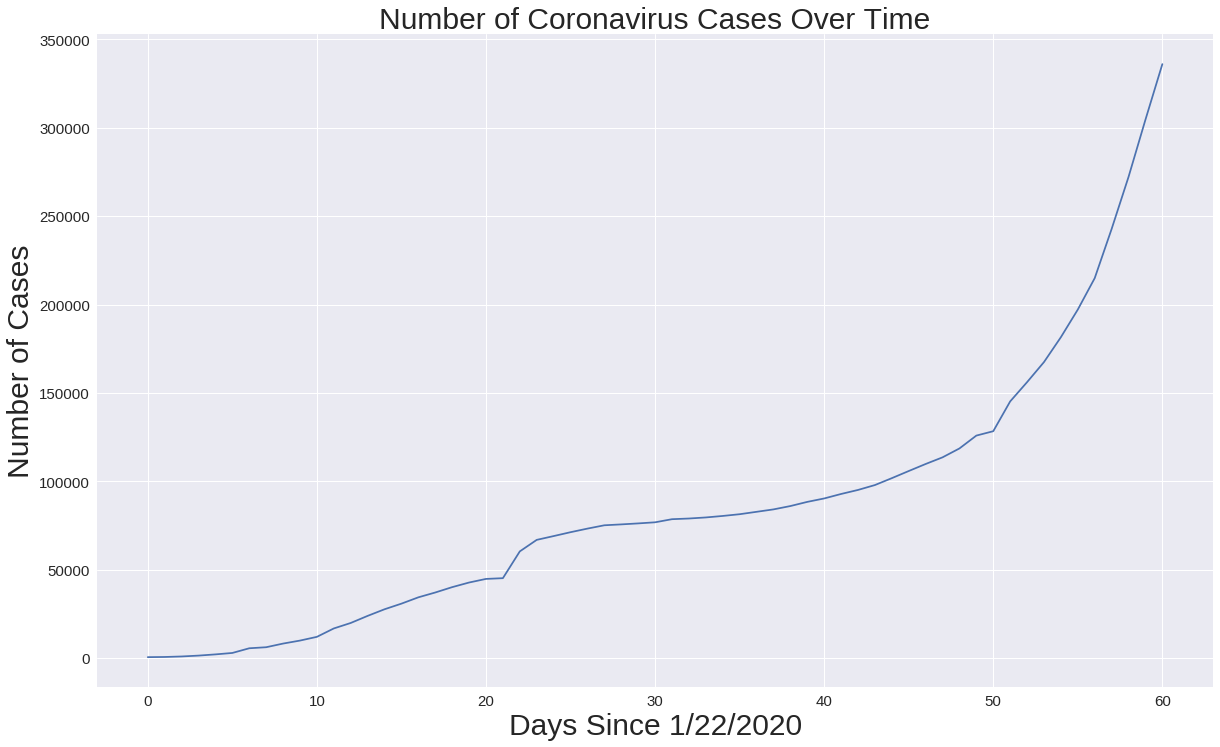

In [50]:
# Total number of coronavirus cases over time
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

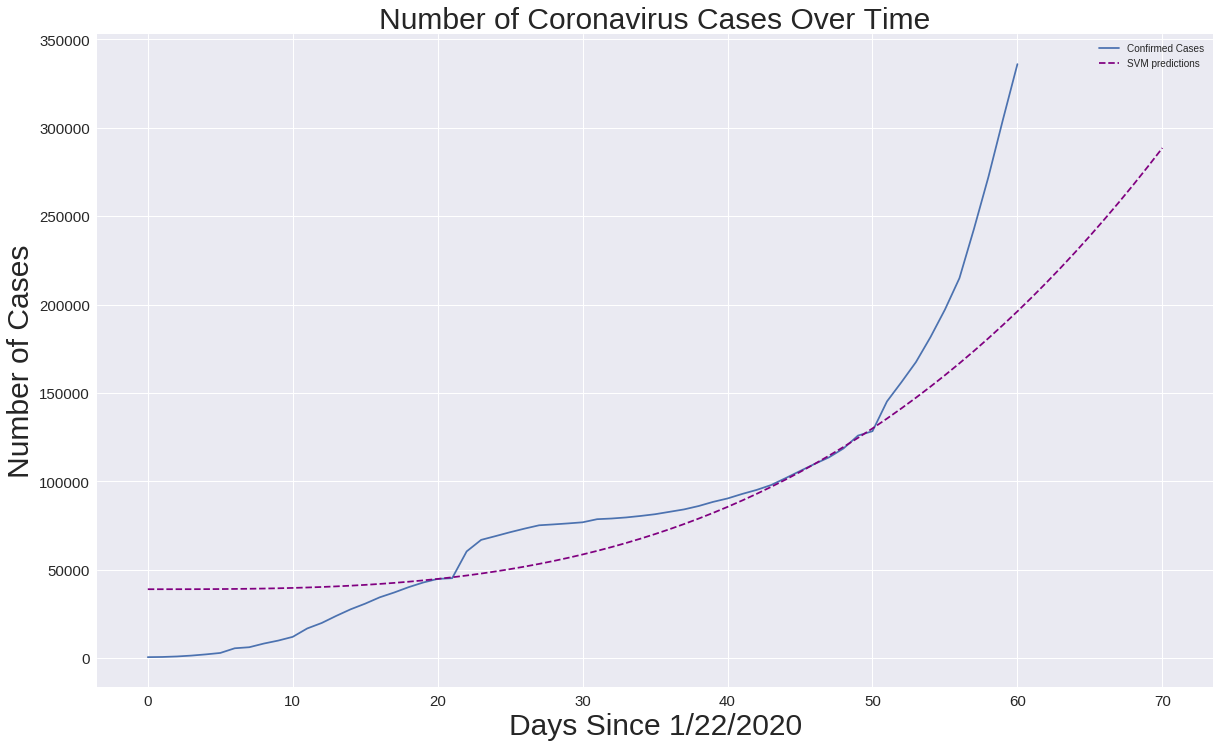

In [51]:
# Confirmed vs Predicted Cases
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast, svm_pred, linestyle='dashed', color='purple')
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [52]:
# Prediction for the next 10 days using SVM
print('SVM future predictions:')
set(zip(future_forcast_dates[-10:], svm_pred[-10:]))

SVM future predictions:


{('03/23/2020', 204113.28485654935),
 ('03/24/2020', 212368.3619451847),
 ('03/25/2020', 220894.0734461734),
 ('03/26/2020', 229694.78443068225),
 ('03/27/2020', 238774.8599698784),
 ('03/28/2020', 248138.66513492877),
 ('03/29/2020', 257790.5649970002),
 ('03/30/2020', 267734.9246272601),
 ('03/31/2020', 277976.10909687507),
 ('04/01/2020', 288518.483477012)}

In [53]:
# Using Linear Regression Model to make Predictions
linear_model = LinearRegression(normalize = True,fit_intercept = True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 84873.35544494718
MSE: 10189002719.007877


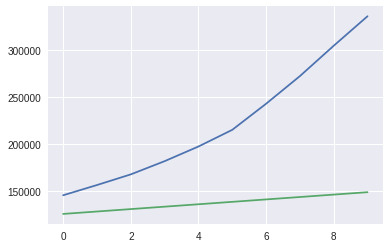

In [54]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)

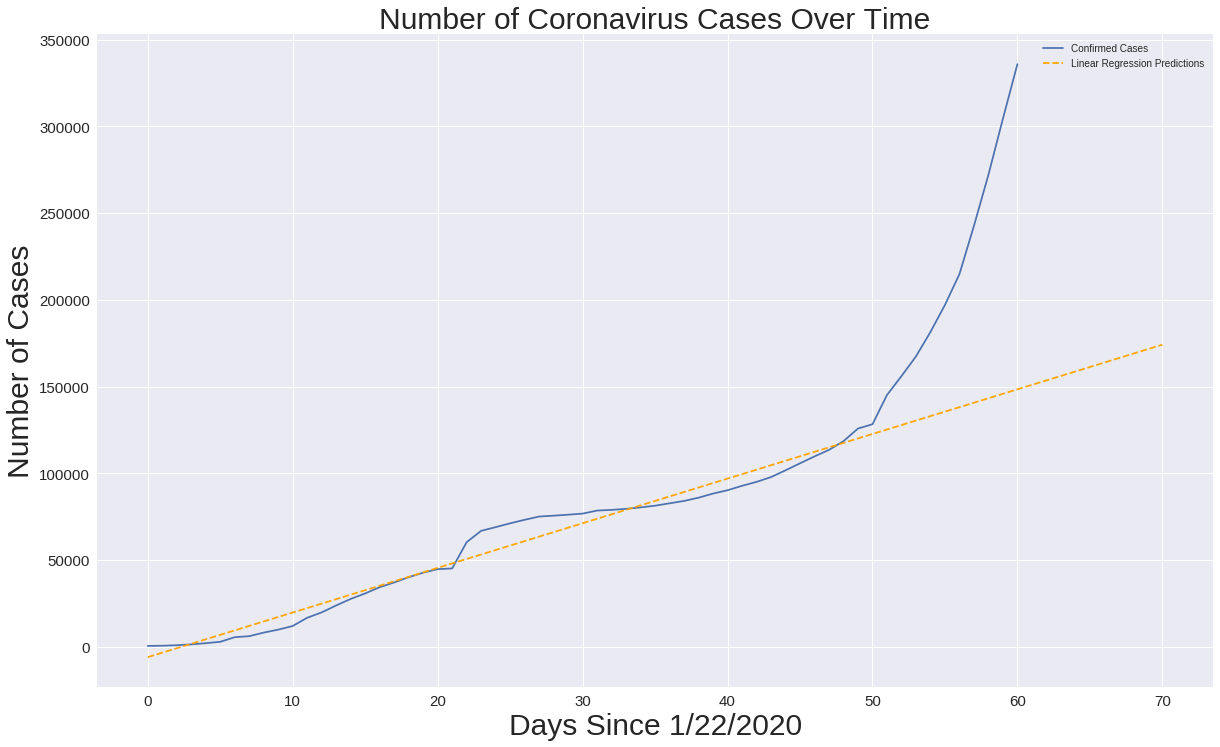

In [55]:
# Graphing the number of confirmed cases, deaths, active cases, and the mortality rate over time, as well as the number of recoveries
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast, linear_pred, linestyle='dashed', color='orange')
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [56]:
# Prediction for the next 10 days using Linear Regression
print('Linear regression future predictions:')
print(linear_pred[-10:])

Linear regression future predictions:
[151046.68428356 153620.05514329 156193.42600302 158766.79686275
 161340.16772247 163913.5385822  166486.90944193 169060.28030166
 171633.65116139 174207.02202112]


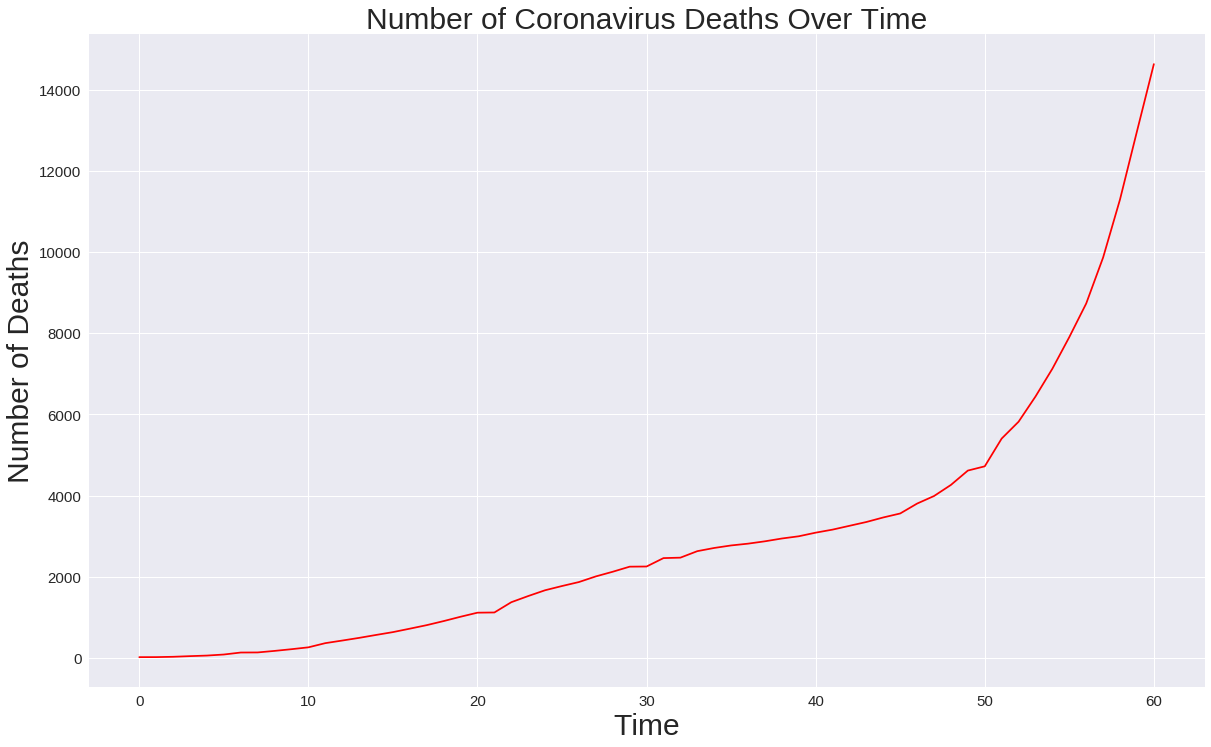

In [57]:
# Total Deaths over time
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths, color='red')
plt.title('Number of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Deaths', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

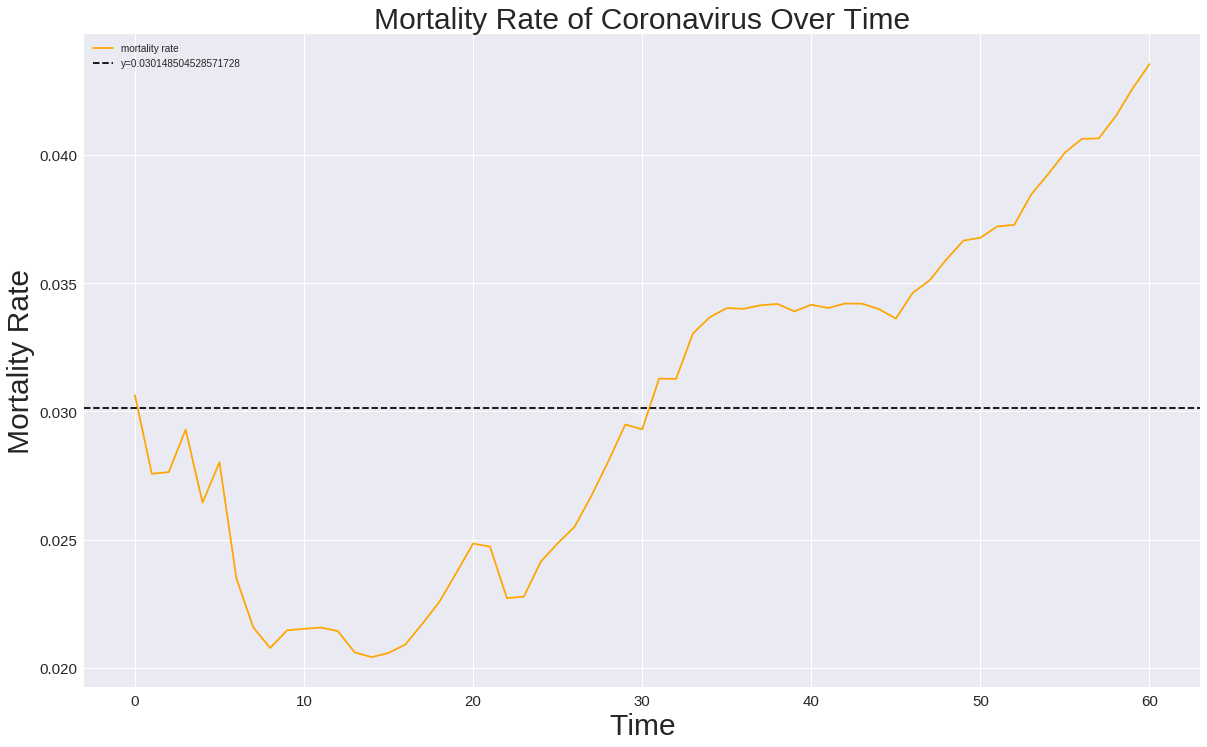

In [58]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)])
plt.xlabel('Time', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

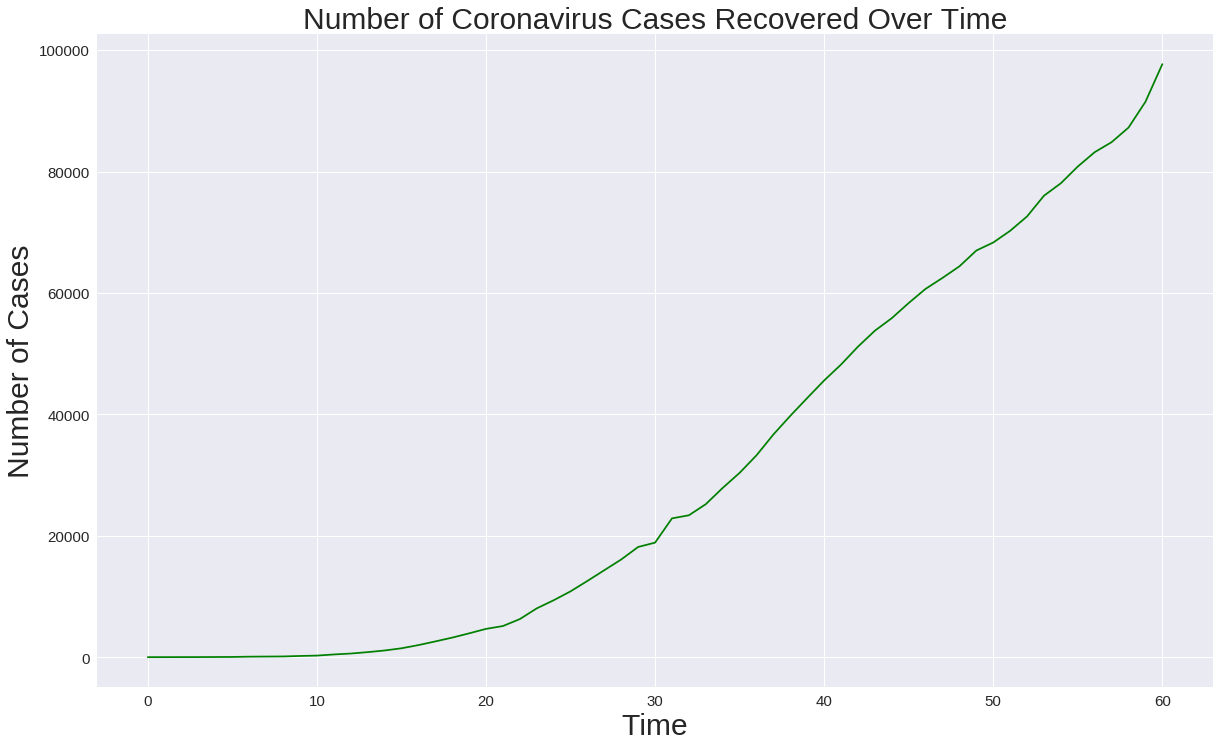

In [59]:
# Coronavirus cases Recovered over Time

plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_recovered, color='green')
plt.title('Number of Coronavirus Cases Recovered Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

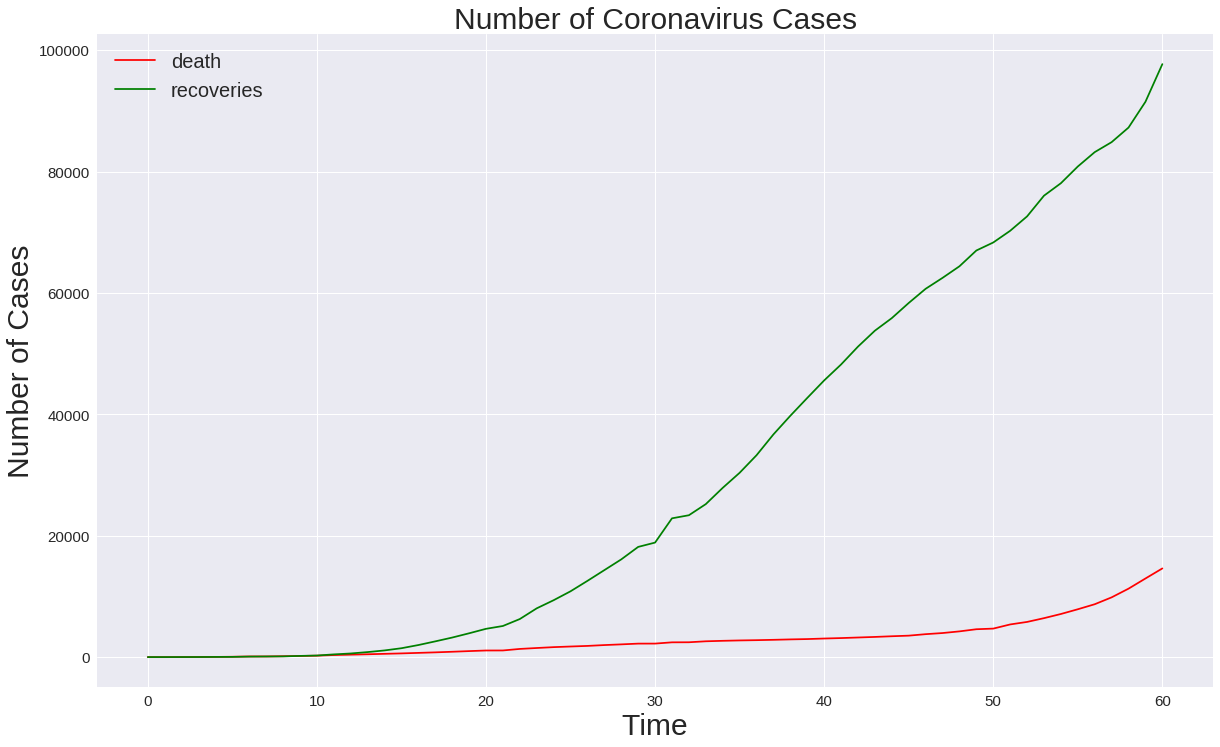

In [60]:
# Number of Coronavirus cases recovered vs the number of deaths
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('Number of Coronavirus Cases', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

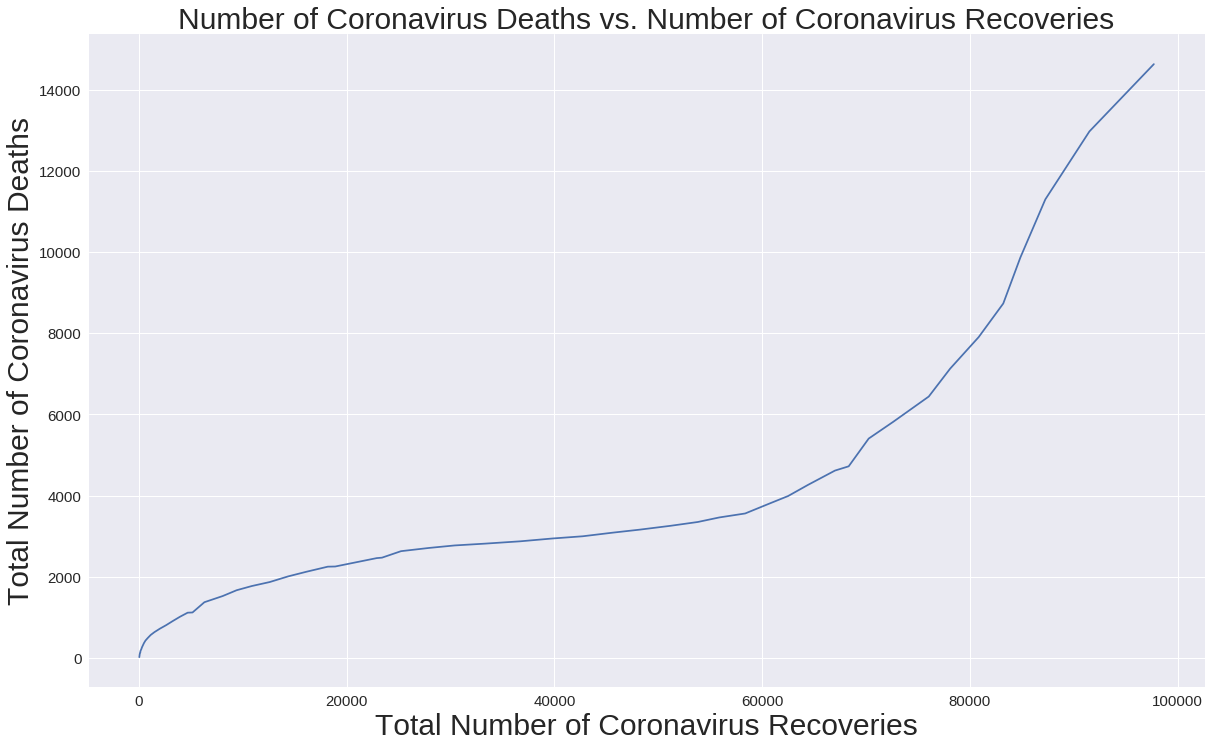

In [61]:
# Coronavirus Deaths vs Recoveries
plt.figure(figsize=(20, 12))
plt.plot(total_recovered, total_deaths)
plt.title('Number of Coronavirus Deaths vs. Number of Coronavirus Recoveries', size=30)
plt.xlabel('Total Number of Coronavirus Recoveries', size=30)
plt.ylabel('Total Number of Coronavirus Deaths', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()